In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

<h2>Линейная регрессия (Linear regression) </h2>— математическая модель, которая описывает связь нескольких переменных. Это статистическая процедура, которая помогает прогнозировать будущее.

<b>Цель линейной регрессии</b> — найти такую прямую линию, которая наилучшим образом описывает данные


#### **1. Производная по весам \( w_j \) (для каждого признака \( j \))**

$$\frac{\partial J}{\partial w_j} = \frac{2}{n} \sum_{i=1}^{n} \big( \hat{y}_i - y_i \big) \cdot x_{i,j}$$
где $ x_{i,j} $ — значение $ j $-го признака в $ i $-м наблюдении.  


#### **2. Производная по смещению \( b \)**
$$
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} \big( \hat{y}_i - y_i \big)
$$
В векторной форме:  
$$
\nabla_b J = \frac{2}{n} \sum (\hat{y} - y)
$$

---


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.scaler = StandardScaler()
        self.loss_history = []

    def _compute_loss(self, X, y):
        """Вычисление MSE (Mean Squared Error)"""
        predictions = X.dot(self.weights) + self.bias
        return np.mean((predictions - y)**2)



    def fit(self, X, y):
        X = self.scaler.fit_transform(X)  # Нормализация
        n_samples, n_features = X.shape

        self.weights = np.random.randn(n_features) * 0.01  # Инициализация
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Gradient Clipping
            max_grad = 1.0
            dw = np.clip(dw, -max_grad, max_grad)
            db = np.clip(db, -max_grad, max_grad)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = self._compute_loss(X,y)
            self.loss_history.append(loss)


    def predict(self, X):
        X = self.scaler.transform(X)  # Нормализация новых данных
        return np.dot(X, self.weights) + self.bias


<h4>При создании модели применял масштабирование данных и обрезку градиента, чтобы предотвратить проблемы с затуханием и взрывом градиента.

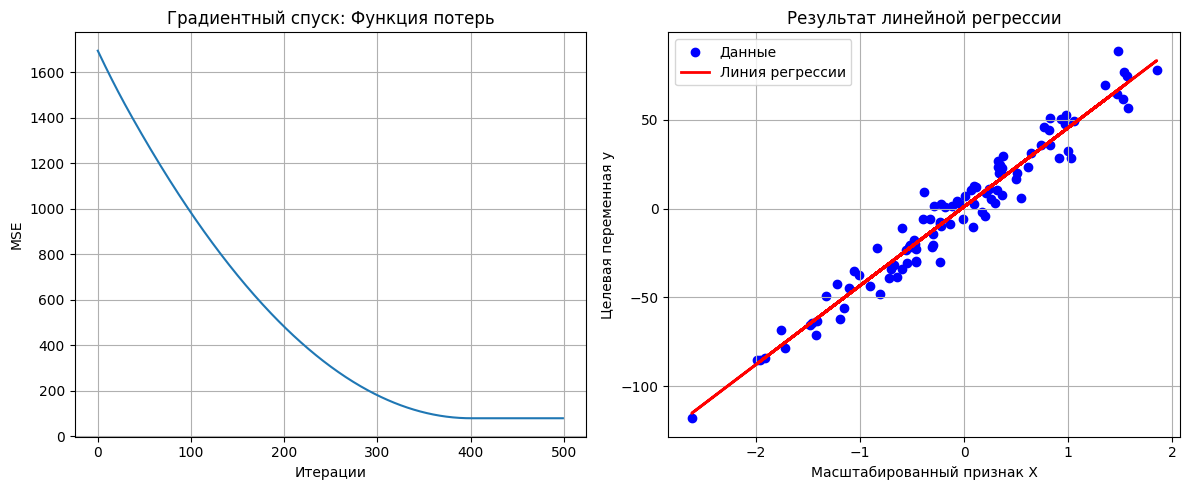


Обученные параметры:
Веса (коэффициенты): [40.15414565]
Смещение (intercept): -3.4495300260180404


In [7]:
# 1. Генерация данных
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


# 2. Обучение модели
model = LinearRegression(learning_rate=0.1, n_iters=500)
model.fit(X, y)

# 3. Визуализация процесса обучения
plt.figure(figsize=(12, 5))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(range(model.n_iters), model.loss_history)
plt.title('Градиентный спуск: Функция потерь')
plt.xlabel('Итерации')
plt.ylabel('MSE')
plt.grid(True)

# График регрессии
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, model.predict(X), color='red',
         linewidth=2, label='Линия регрессии')
plt.title('Результат линейной регрессии')
plt.xlabel('Масштабированный признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод параметров модели
print(f"\nОбученные параметры:")
print(f"Веса (коэффициенты): {model.weights}")
print(f"Смещение (intercept): {model.bias}")